In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> sibSp = that person no. of  sibling & spouse travel with eg. if 3 then 1 spouse and 2 sibling.

> Parch = that person parents and child eg. if 5 then 1 parents and 4 child.

> embarked = three city where ship passby during journey, C=curber(in french), Q = queens town (in ireland), S = south-Hamptan (in england).

> survival - Survival (0 = No; 1 = Yes)

> class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

> name - Name

> Gender - Sex

> age - Age

> sibsp - Number of Siblings/Spouses Aboard

> parch - Number of Parents/Children Aboard

> ticket - Ticket Number

> fare - Passenger Fare

> cabin - Cabin

> embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Golden rules:
> 1. if any columns that more then 50 % then drop that columns.

> 2. for data analysis you should drop unique columns which have all unique value that doesn't related to other columns like eg. name, Ticket, passanger in all three every person have unique name , passanger id& ticket so its not make sense for grouping it.

> 3. why we drop this because its make noises in ml model so my model perform bad.


In [7]:
# drop the columns which i dont need
df.drop(['PassengerId','Name','Ticket','Cabin'] , axis=1,inplace=True)
# axis =1 because we drop by column & inplace = True because we want to change into original dataset


In [8]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# drop null value
df.dropna(inplace=True)


In [10]:
# again check null value
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df.shape

(712, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Gender    712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [13]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# check which columns is categorical and numerical 

In [14]:
# check columns
df.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## categorical columns

> usually we take max 10 categories.

> used .value_count() for categorical for know about data

In [ ]:
df['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

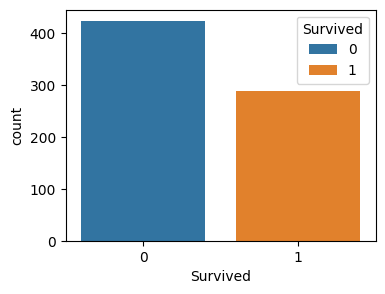

In [16]:
# plot for visulization
plt.figure(figsize=(4,3)) # for resize plot 4 = height, 3= figure
sns.countplot(x='Survived', data=df,hue='Survived')

In [17]:
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

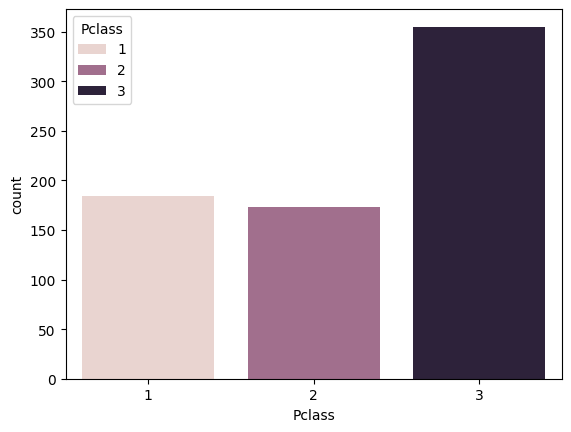

In [18]:
sns.countplot(x='Pclass',data=df,hue='Pclass')

In [19]:
df['Gender'].value_counts()


Gender
male      453
female    259
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

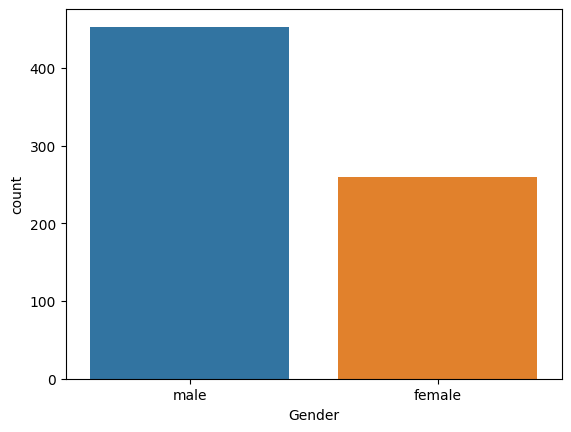

In [20]:
sns.countplot(x='Gender',data=df,hue='Gender')

In [21]:
df['SibSp'].value_counts()

SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

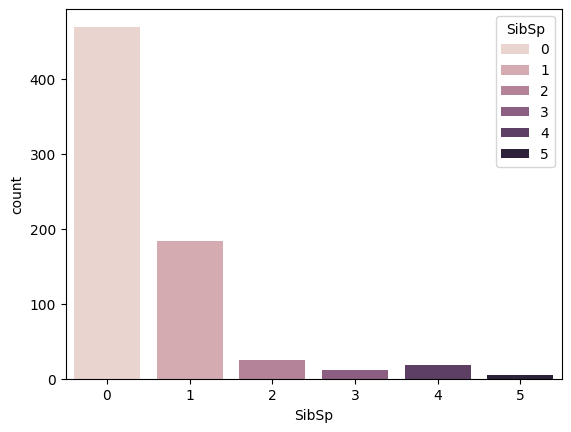

In [22]:
sns.countplot(x='SibSp', data=df, hue='SibSp')

In [23]:
df['Parch'].value_counts()

Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

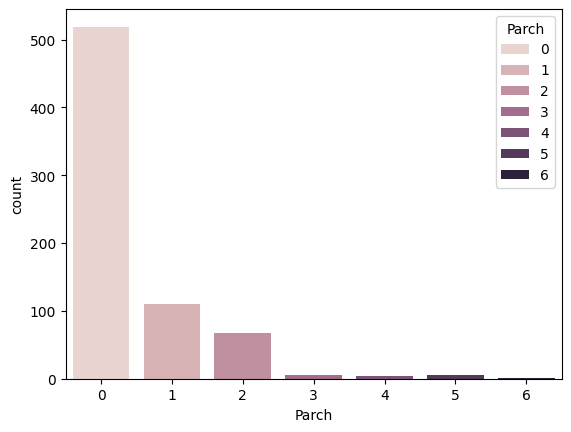

In [24]:
sns.countplot(x='Parch',data=df, hue='Parch')

In [25]:
df['Embarked'].value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

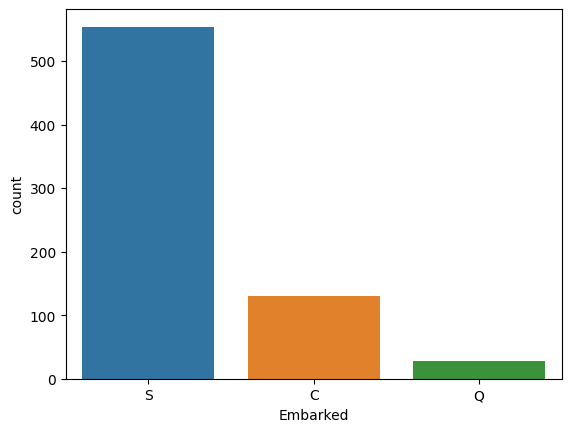

In [26]:
sns.countplot(x='Embarked',data=df,hue='Embarked')

## numerical
> used .describe() for numerical for know about data

In [27]:
df['Fare'].value_counts()

Fare
13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 219, dtype: int64

In [28]:
df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

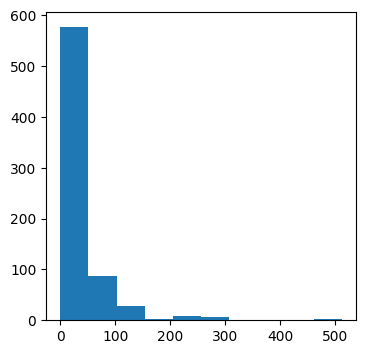

In [29]:
plt.figure(figsize=(4,4))
plt.hist(df['Fare'])
plt.show()

In [30]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [31]:
df['Age'].describe()
'''
count = total number of people in our dataset
mean= avg age
25% = 25% of people are <= 20 years old on ships
'''

'\ncount = total number of people in our dataset\nmean= avg age\n25% = 25% of people are <= 20 years old on ships\n'

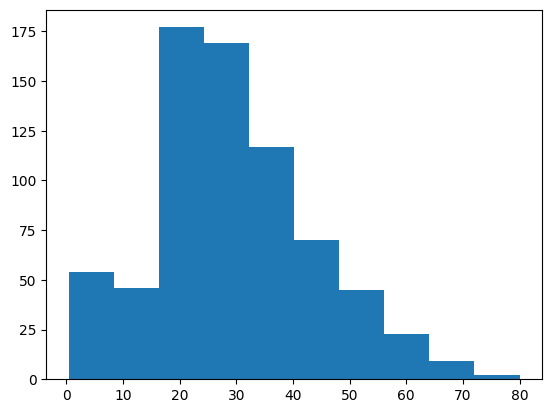

In [32]:
plt.hist(df['Age'])
plt.show()

# ADVANCED INSIGHTS

##  1. Survived vs Gender 

In [33]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [34]:
# we can used from pandas groupby() or pivot_table , here we used groupby because for small tasks
total_person=df.groupby(['Gender',"Survived"]).size().unstack() # .unstack we used for create a dataFrame
# Add a new column for total number of persons per Gender
total_person['Total'] = total_person.sum(axis=1)
total_person

Survived,0,1,Total
Gender,,,
female,64,195,259
male,360,93,453


In [35]:
# plt.xlabel('x-axis')
# plt.ylabel('y-label')
# plt.title('x vs y graph')
# plt.figure(figsize=(8, 8))
# plt.legend(title="x vs y graph")
# plt.show()


<Figure size 100x100 with 0 Axes>

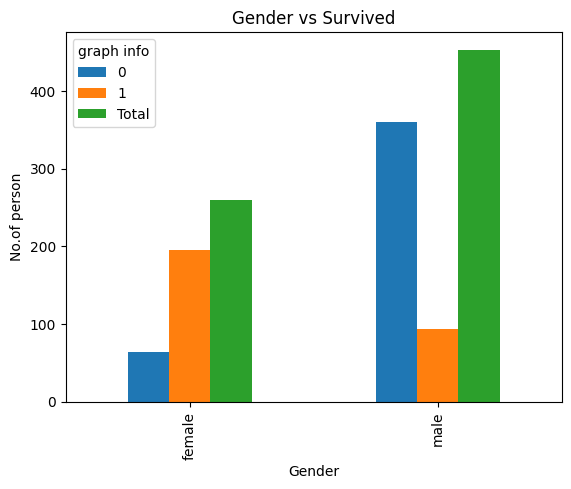

In [36]:
# graph 
plt.figure(figsize=(1, 1))
total_person.plot(kind='bar') # plt bar graph 
plt.ylabel('No.of person')
plt.title('Gender vs Survived')
plt.legend(title="graph info")
plt.show()


In [37]:

# # Data
# labels = ['Female Survived', 'Female Not Survived', 'Male Survived', 'Male Not Survived']
# sizes = [195, 64, 93, 360]  # Survived and Not Survived counts
# colors = ['lightblue', 'pink', 'lightgreen', 'red']  # Custom colors
# explode = (0.1, 0, 0.1, 0)  # Highlight survived sections

# # Plot pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
# plt.title('Survival Distribution by Gender')
# plt.show()


In [38]:

# # Data
# labels = ['Female Survived', 'Female Not Survived', 'Male Survived', 'Male Not Survived']
# sizes = [75.29, 24.71, 20.53, 79.47]  # Correct percentages
# colors = ['lightblue', 'pink', 'lightgreen', 'red']  # Custom colors
# explode = (0.1, 0, 0.1, 0)  # Highlight survived sections

# # Plot pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
# plt.title('Survival Distribution by Gender')
# plt.show()


In [ ]:

# # Create DataFrame
# data = {
#     'Gender': ['Female', 'Male'],
#     'Not Survived': [64, 360],
#     'Survived': [195, 93]
# }
# df = pd.DataFrame(data)

# # Plot Bar Chart
# plt.figure(figsize=(8, 6))
# df.set_index('Gender').plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')

# # Labels & Title
# plt.xlabel('Gender')
# plt.ylabel('Number of People')
# plt.title('Survival Count by Gender')
# plt.xticks(rotation=0)
# plt.legend(title="Survival Status")

# # Show Plot
# plt.show()


## Survived vs Pclass 


In [44]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [41]:
PandS_grouped= df.groupby(['Pclass',"Survived"]).size().unstack()
PandS_grouped['Total'] = PandS_grouped.sum(axis=1)
PandS_grouped

Survived,0,1,Total
Pclass,,,
1,64,120,184
2,90,83,173
3,270,85,355


Text(0.5, 1.0, 'survived vs Pclass')

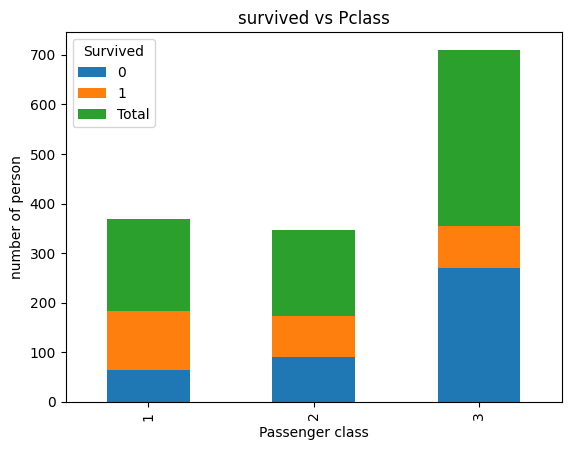

In [42]:
PandS_grouped.plot(kind='bar',stacked=True)
plt.xlabel('Passenger class')
plt.ylabel('number of person')
plt.title('survived vs Pclass')

## Survived (catagorical) vs Age (numerical)

In [50]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [52]:
# the people who doesn't survived & their age
df[df["Survived"]==0]['Age']

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

In [54]:
# the people who survived & their age
df[df['Survived']==1]['Age']


1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 288, dtype: float64

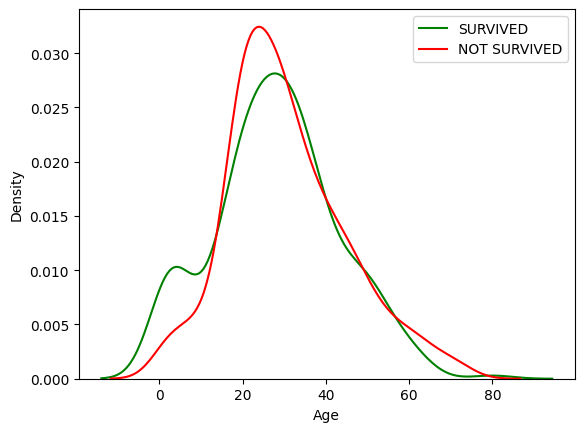

In [59]:
# kde : kernal density estimation
sns.kdeplot(df[df["Survived"]==1]['Age'], color='green',label="SURVIVED")
sns.kdeplot(df[df['Survived']==0]["Age"], color='red',label='NOT SURVIVED')
plt.legend()
plt.show()

## Survived vs Fare 

In [84]:
df[df['Survived']==1]['Fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 288, dtype: float64

In [85]:
df[df['Survived']==0]['Fare']

0       7.2500
4       8.0500
6      51.8625
7      21.0750
12      8.0500
        ...   
883    10.5000
884     7.0500
885    29.1250
886    13.0000
890     7.7500
Name: Fare, Length: 424, dtype: float64

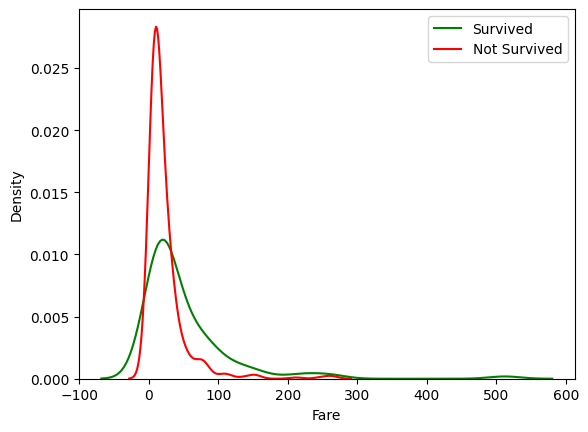

In [87]:
sns.kdeplot(df[df["Survived"]==1]["Fare"],color= "green",label='Survived')
sns.kdeplot(df[df['Survived']==0]['Fare'],color='red',label='Not Survived')
plt.legend()
plt.show()

## Survived vs Embarked

In [60]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [78]:
SandE_grouped = df.groupby(['Embarked','Survived']).size().unstack()
SandE_grouped['Total'] = SandE_grouped.sum(axis=1)
SandE_grouped

Survived,0,1,Total
Embarked,,,
C,51,79,130
Q,20,8,28
S,353,201,554


Text(0.5, 1.0, 'survived vs embarked')

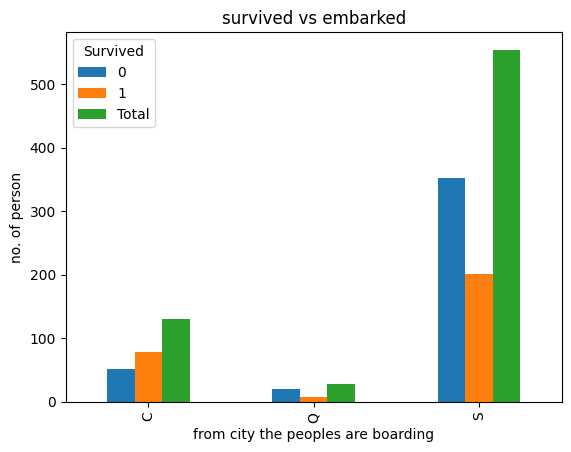

In [83]:
SandE_grouped.plot(kind='bar',stacked=False)
plt.xlabel('from city the peoples are boarding')
plt.ylabel('no. of person')
plt.title('survived vs embarked')


## survived vs Sibsp

In [88]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [97]:
SandSib_grouped = df.groupby(['Survived','SibSp']).size().unstack()
SandSib_grouped['Total'] = SandSib_grouped.sum(axis=1)
SandSib_grouped

SibSp,0,1,2,3,4,5,Total
Survived,,,,,,,
0,296.0,86.0,14.0,8.0,15.0,5.0,424.0
1,173.0,97.0,11.0,4.0,3.0,NaN,288.0


<Axes: xlabel='Survived'>

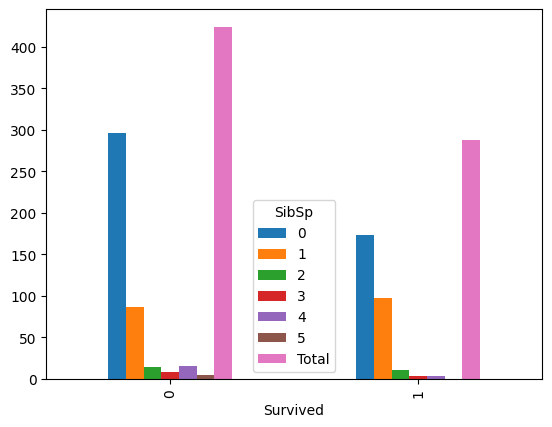

In [105]:
SandSib_grouped.plot(kind='bar')

## survived vs Parch

In [103]:
SandP_grouped = df.groupby(['Survived','Parch']).size().unstack()
SandP_grouped['Total'] = SandP_grouped.sum(axis=1)
SandP_grouped

Parch,0,1,2,3,4,5,6,Total
Survived,,,,,,,,
0,335.0,49.0,29.0,2.0,4.0,4.0,1.0,424.0
1,184.0,61.0,39.0,3.0,NaN,1.0,NaN,288.0


<Axes: xlabel='Survived'>

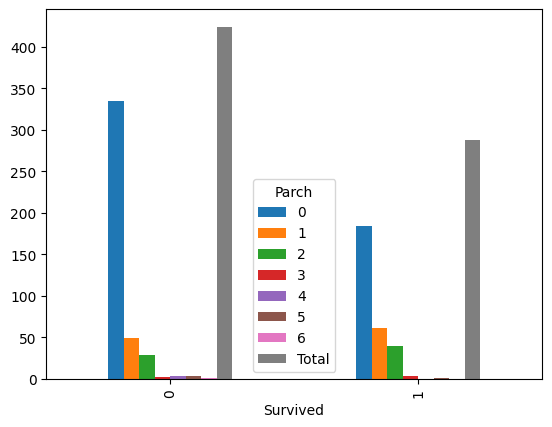

In [106]:
SandP_grouped.plot(kind='bar')

# correlation

In [107]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [108]:
df.dtypes

Survived      int64
Pclass        int64
Gender       object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [110]:
numeric_df = df.select_dtypes(include=['float','int'])
numeric_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


In [111]:
numeric_df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [113]:
corr=numeric_df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

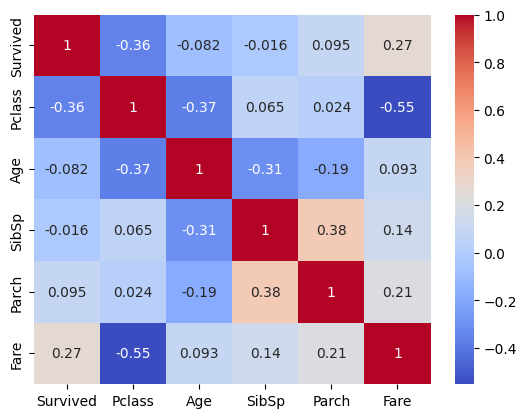

In [117]:
sns.heatmap(corr, cmap='coolwarm',annot=True)

# multivariate

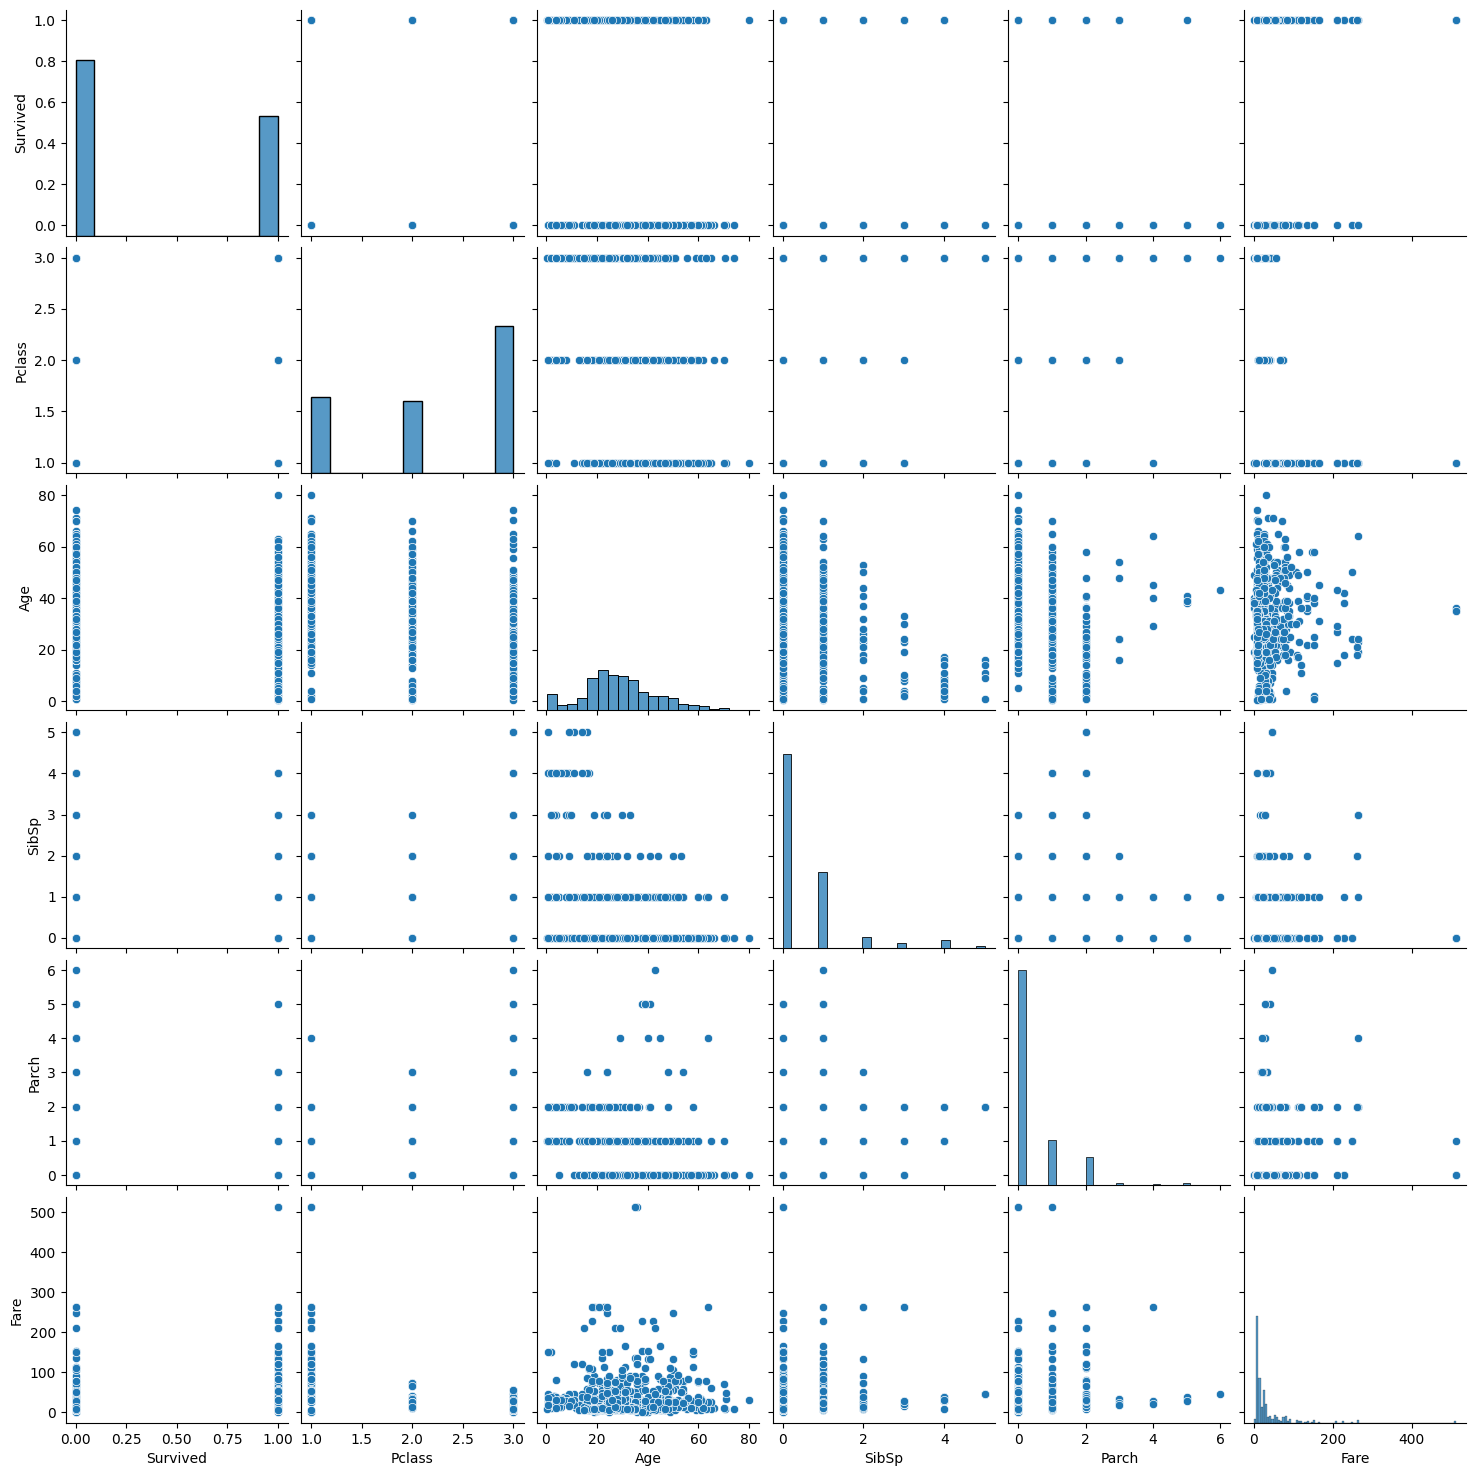

In [118]:
sns.pairplot(df)

## age vs gender

In [120]:
male_data = df[df['Gender']=='male']
male_data.head(5)



,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
12,0,3,male,20.0,0,0,8.0500,S


In [121]:
female_data = df[df['Gender']=='female']
female_data.head(5)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


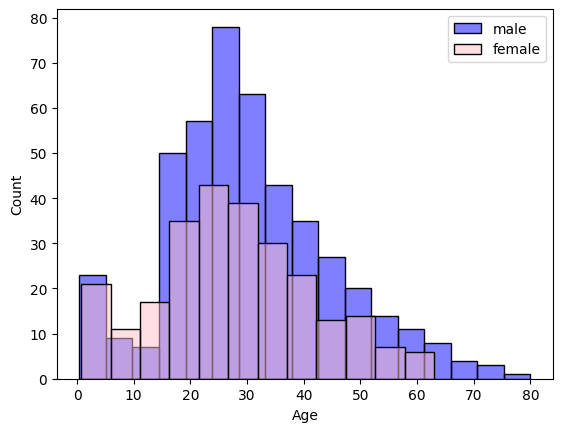

In [124]:
sns.histplot(data=male_data,x='Age',color='blue',label='male',alpha=0.5)
sns.histplot(data=female_data,x='Age',color='pink',label='female',alpha=0.5)
plt.legend()
plt.show()